In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

import cv2

from skimage.io import imread
from skimage import color

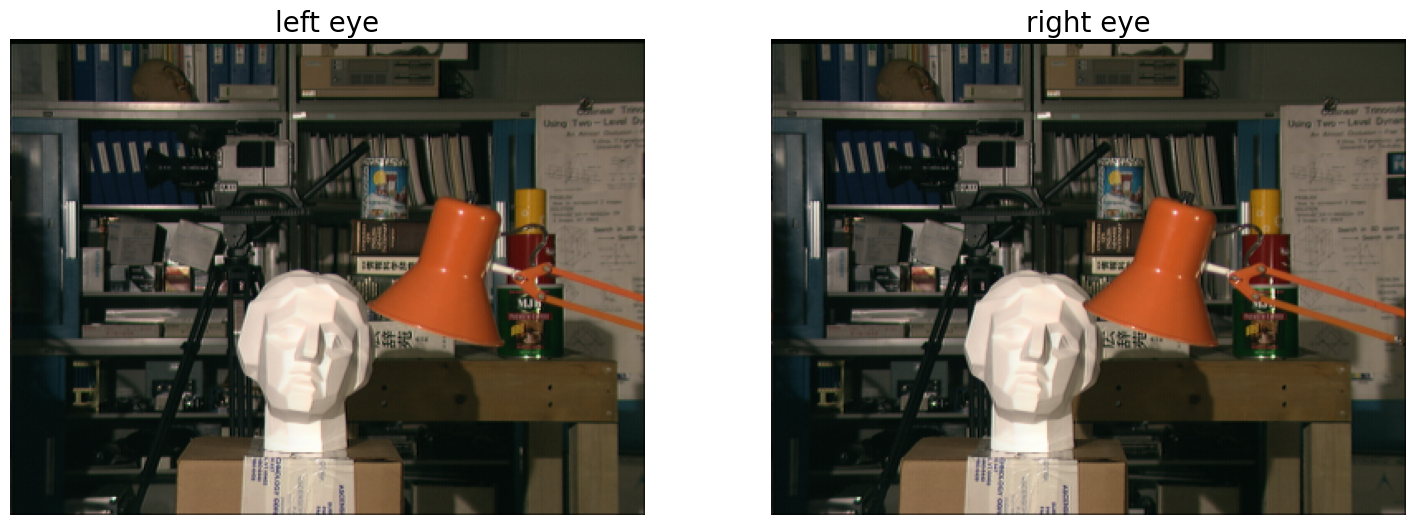

In [2]:
left = imread('tsukuba_col1.ppm')
right = imread('tsukuba_col3.ppm')

plt.figure(figsize=(18,9))

plt.subplot(121)
plt.imshow(left, cmap = 'gray')
plt.axis('off')
plt.title('left eye', fontsize=20)

plt.subplot(122)
plt.imshow(right, cmap = 'gray')
plt.axis('off')
plt.title('right eye', fontsize=20)

plt.show()

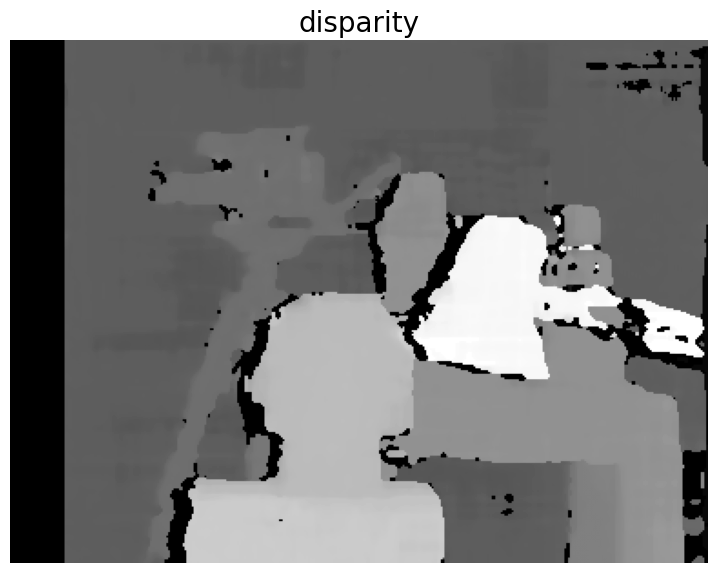

In [3]:
window_size = 5
# Creating an object of StereoSGBM algorithm
stereo = cv2.StereoSGBM_create(
        minDisparity = 0,
        numDisparities = 30,
        blockSize = window_size,
        P1=8 * 3 * window_size ** 2,    
        P2=32 * 3 * window_size ** 2,
        disp12MaxDiff = -1,     # -1 means off
        uniquenessRatio = 20,
        speckleWindowSize = 3,   # 0 means off
        speckleRange = 2,
        preFilterCap=0,
        mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
    )

# Calculating disparity using the StereoSGBM algorithm
disp = stereo.compute(left, right).astype(np.float32)
disp = cv2.normalize(disp,0,255,cv2.NORM_MINMAX)

plt.figure(figsize=(9,7))
plt.imshow(disp, 'gray')
plt.axis('off')
plt.title('disparity', fontsize=20)

plt.show()